<a href="https://colab.research.google.com/github/jek5on/MH/blob/main/%D0%BB%D0%B0%D0%B15_%D0%A1%D0%B2%D0%B0%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%A4%D0%86%D0%A2_4_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Сватенко ФІТ 4-8

Лабораторна робота №5

Метод ліктя. Кластеризація даних.


Завдання 1.

*   Завантажити датасет Ірис.
*   Роздрукувати перші 5 рядочків.
*   Методом ліктя і методом силуєтів визначити оптимальну кількість кластерів.
*   Візуалізувати кластери.

Перші 5 рядків датасету:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


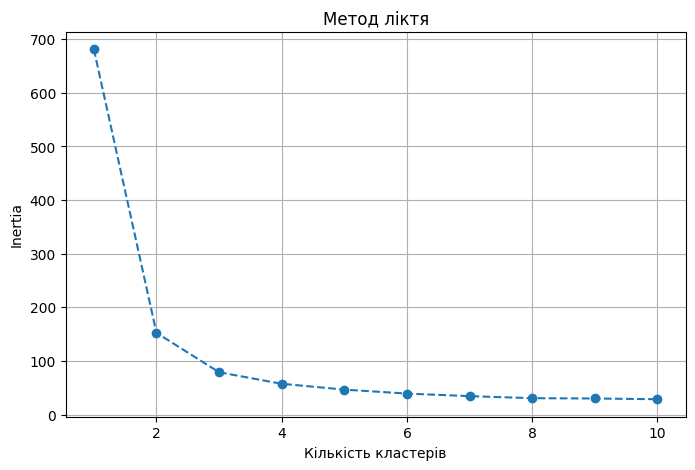

Для 2 кластерів середній коефіцієнт силуета: 0.6810461692117462
Для 3 кластерів середній коефіцієнт силуета: 0.551191604619592
Для 4 кластерів середній коефіцієнт силуета: 0.49764331793219224
Для 5 кластерів середній коефіцієнт силуета: 0.4930804067193521
Для 6 кластерів середній коефіцієнт силуета: 0.36784649847122436
Для 7 кластерів середній коефіцієнт силуета: 0.3542978877198849
Для 8 кластерів середній коефіцієнт силуета: 0.34467972180561923
Для 9 кластерів середній коефіцієнт силуета: 0.31558878533897633
Для 10 кластерів середній коефіцієнт силуета: 0.3014143745325133


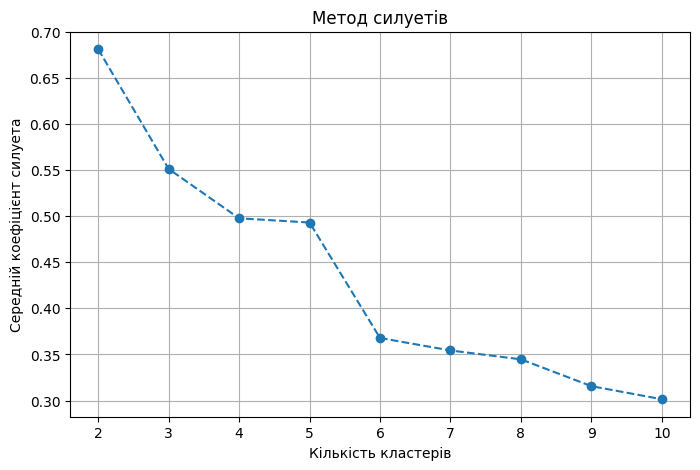

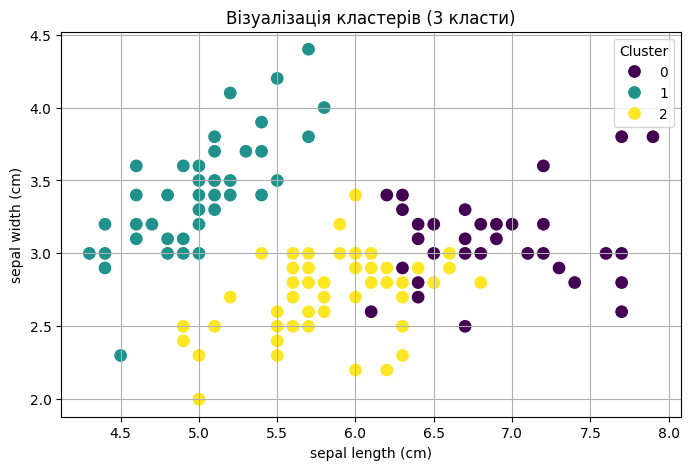

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

print("Перші 5 рядків датасету:")
print(df.head())

inertia = []
range_n_clusters = range(1, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

silhouette_scores = []

for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Для {n_clusters} кластерів середній коефіцієнт силуета: {silhouette_avg}")

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуета')
plt.grid(True)
plt.show()

optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title('Візуалізація кластерів (3 класти)')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.grid(True)
plt.show()


**Висновок:**

У цьому завданні був проведений кластерний аналіз датасету "Ірис" за допомогою алгоритму KMeans. Метод ліктя та метод силуетів визначили оптимальну кількість кластерів, яка становить 3. Це підтверджується високим значенням коефіцієнта силуета та згином у графіку інерції. Візуалізація показала чіткий поділ точок на три групи, що відповідає трьом видам ірису в датасеті (setosa, versicolor, virginica). Таким чином, кластеризація виявилася ефективною для групування даних.

Завдання 2.

Завантажити датасет Student_data.csv (датасет з Kaggle)

Реалізувати попередній аналіз даних:

Роздрукувати перші 5 рядків.

Вивести розмір датасета, типи даних.

Перевірити на пропущені значення. При наявності замінити на середнє за
стовпцем.

Перевірити на дублікати. Якщо є – видалити. Вивести описову статистику.
Визначити, яку задачу розв’язуємо (регресія чи класифікація).Побудувати 3
моделі на вибір для визначення оцінки. Підібрати оптимальні параметри.

Оцінити моделі.

Визначити методом ліктя і силуєтів оптимальну кількість кластерів.

Візуалізувати кластери.




Saving student-data.csv to student-data (7).csv
Перші 5 рядків:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  internet romantic  famrel  freetime  goout Dalc Walc health absences passed  
0       no       no       4         3      4    1    1      3        6     no  
1      yes       no       5         3      3    1    1      3        4     no  
2      yes       no       4         3      2    2    3      3       10    yes  
3      yes      yes       3         2      2    1    1      5        2    yes  
4       no       no       4         3      2    1

<ipython-input-8-f8c2575d7de5>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)


Logistic Regression Accuracy: 0.8860759493670886

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93        67
           1       0.67      0.50      0.57        12

    accuracy                           0.89        79
   macro avg       0.79      0.73      0.75        79
weighted avg       0.88      0.89      0.88        79

Decision Tree Accuracy: 0.8481012658227848

Classification Report for Decision Tree:
               precision    recall  f1-score   support

           0       0.90      0.93      0.91        67
           1       0.50      0.42      0.45        12

    accuracy                           0.85        79
   macro avg       0.70      0.67      0.68        79
weighted avg       0.84      0.85      0.84        79

Random Forest Accuracy: 0.8481012658227848

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


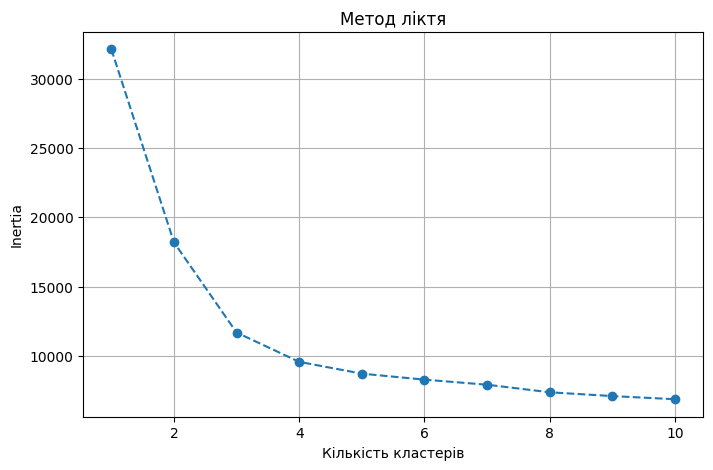

Для 2 кластерів середній коефіцієнт силуета: 0.5537073566865446
Для 3 кластерів середній коефіцієнт силуета: 0.4272924769687308
Для 4 кластерів середній коефіцієнт силуета: 0.2806621303070299
Для 5 кластерів середній коефіцієнт силуета: 0.1927533091328101
Для 6 кластерів середній коефіцієнт силуета: 0.14108683182936863
Для 7 кластерів середній коефіцієнт силуета: 0.11508475071772048
Для 8 кластерів середній коефіцієнт силуета: 0.12423188311077618
Для 9 кластерів середній коефіцієнт силуета: 0.11423901062298057
Для 10 кластерів середній коефіцієнт силуета: 0.10351808709680732


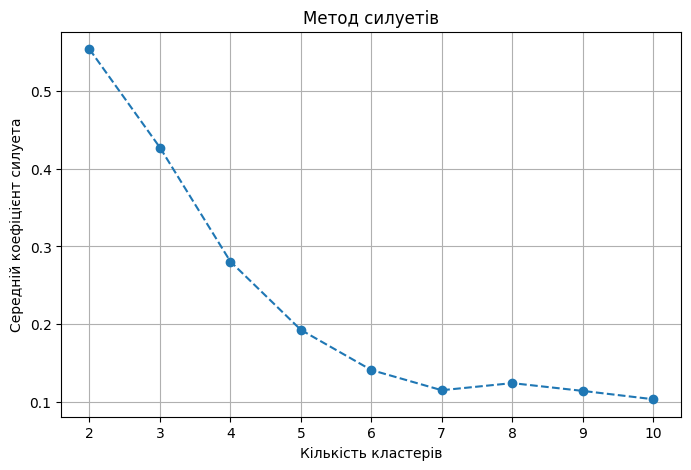

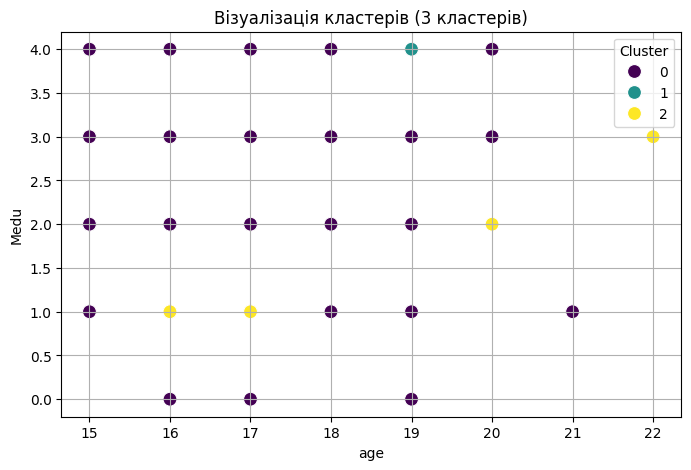

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import LabelEncoder
from google.colab import files

uploaded = files.upload()
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Перші 5 рядків:")
print(df.head())
print("\nРозмір датасету:", df.shape)
print("\nТипи даних:")
print(df.dtypes)

df.fillna(df.select_dtypes(include=[np.number]).mean(), inplace=True)

for column in df.select_dtypes(include=['object']).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

# Перевірка на дублікати
df.drop_duplicates(inplace=True)

# Описова статистика
print("\nОписова статистика:")
print(df.describe(include='all'))

# Визначення цільової змінної
target_column = 'school'
if target_column not in df.columns:
    raise ValueError(f"Цільова змінна '{target_column}' відсутня в датасеті")

# Перевірка на тип цільової змінної
if df[target_column].dtype == 'object':
    df[target_column] = LabelEncoder().fit_transform(df[target_column])

# Кодування всіх категоріальних змінних
categorical_columns = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Вибір моделі
if df[target_column].nunique() > 10:
    print("\nЗадача: регресія")
    X = df.drop(columns=[target_column])
    y = df[target_column]
    models = {
        "Linear Regression": LinearRegression(),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }
else:
    print("\nЗадача: класифікація")
    X = df.drop(columns=[target_column])
    y = df[target_column]
    models = {
        "Logistic Regression": LogisticRegression(max_iter=1000),
        "Decision Tree": DecisionTreeClassifier(),
        "Random Forest": RandomForestClassifier()
    }

# Розділення на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Тренування та оцінка моделей
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    if df[target_column].nunique() > 10:
        mse = mean_squared_error(y_test, predictions)
        print(f"{name} MSE: {mse}")
    else:
        accuracy = accuracy_score(y_test, predictions)
        print(f"{name} Accuracy: {accuracy}")
        print(f"\nClassification Report for {name}:\n", classification_report(y_test, predictions))

# Визначення оптимальної кількості кластерів методом ліктя
inertia = []
range_n_clusters = range(1, 11)
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range_n_clusters, inertia, marker='o', linestyle='--')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# Метод силуетів
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"Для {n_clusters} кластерів середній коефіцієнт силуета: {silhouette_avg}")

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній коефіцієнт силуета')
plt.grid(True)
plt.show()

# Візуалізація кластерів для оптимальної кількості
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

plt.figure(figsize=(8, 5))
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=df['Cluster'], palette='viridis', s=100)
plt.title(f'Візуалізація кластерів ({optimal_clusters} кластерів)')
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.grid(True)
plt.show()




**Висновок:**

У даному завданні проведено аналіз датасету `Student_data.csv`. Після попереднього аналізу даних, включаючи обробку пропусків та дублікатів, були побудовані три моделі для класифікації: логістична регресія, дерево рішень та випадковий ліс. Кожна модель була оцінена за точністю, що дозволило визначити найкращий підхід до задачі. Окрім цього, було застосовано методи ліктя і силуетів для визначення оптимальної кількості кластерів у даних, що допомогло візуалізувати кластеризацію та покращити розуміння структури даних. Загалом, аналіз надав цінну інформацію про можливості класифікації та кластеризації в даному контексті.